### Import packages

In [1]:
import functions as fun
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

### Read data

In [2]:
path = ".\..\data\MEPS_data_preprocessed"
X_train, y_train = fun.read_x_y(path + "_train.csv", "HEALTHEXP")
X_test, y_test = fun.read_x_y(path + "_test.csv", "HEALTHEXP")

In [3]:
# All data (train + test)
X = X_train.copy()
X = X.append(X_test, ignore_index = True)

y = y_train.copy()
y = y.append(y_test, ignore_index = True)

### Positive diagnoses

In [4]:
diagnoses_names = [name for name in X.columns.values if name[-2:] == "DX"]
fn = lambda row: sum([row[n] for n in diagnoses_names if row[n] == 1])
X["POSTV"] = X.apply(fn, axis = 1)

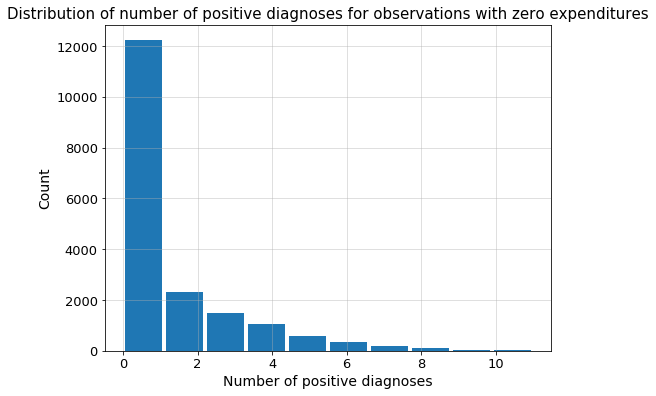

In [5]:
plt.figure(figsize = (8, 6))
plt.hist(X["POSTV"], rwidth = 0.9)
plt.grid(alpha = 0.5)
plt.title("Distribution of number of positive diagnoses for observations with zero expenditures", size = 15)
plt.xlabel("Number of positive diagnoses", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13)
# plt.savefig("images/ .png")
plt.show()

In [6]:
print("Observations with positive diagnoses = 0 constitute about", np.round(100 * X[X["POSTV"] == 0].shape[0] / X.shape[0], 2), "% of all observations.")
print("Observations with positive diagnoses > 0 constitute about", np.round(100 * X[X["POSTV"] > 0].shape[0] / X.shape[0], 2), "% of all observations.")

Observations with positive diagnoses = 0 constitute about 46.11 % of all observations.
Observations with positive diagnoses > 0 constitute about 53.89 % of all observations.


### Observations with expenditures equal to zero

In [7]:
y0 = y[y == 0].copy()
X0 = X.iloc[y0.index.values].copy()

In [8]:
X0.shape

(2623, 44)

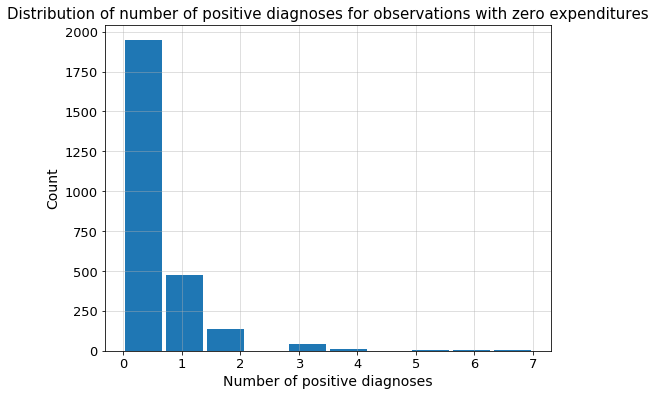

In [9]:
plt.figure(figsize = (8, 6))
plt.hist(X0["POSTV"], rwidth = 0.9)
plt.grid(alpha = 0.5)
plt.title("Distribution of number of positive diagnoses for observations with zero expenditures", size = 15)
plt.xlabel("Number of positive diagnoses", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.savefig("images/06-postv-diagnoses-zero-expenditures-hist.png", bbox_inches = "tight")
plt.show()

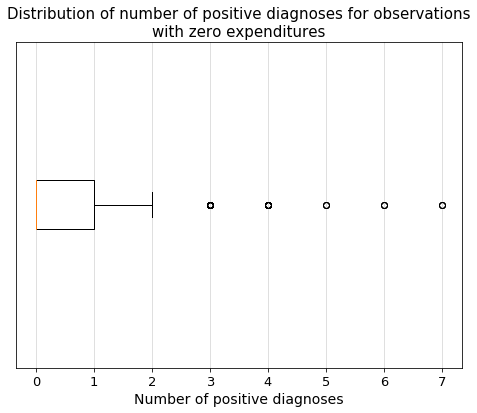

In [10]:
plt.figure(figsize = (8, 6))
# plt.hist(X0["POSTV"], rwidth = 0.9)
plt.boxplot(X0["POSTV"], vert = False)
plt.grid(alpha = 0.5)
plt.title("Distribution of number of positive diagnoses for observations\nwith zero expenditures", size = 15)
plt.xlabel("Number of positive diagnoses", size = 14)
plt.xticks(size = 13)
plt.yticks([])
# plt.savefig("images/06-postv-diagnoses-zero-expenditures-boxplot.png")
plt.show()

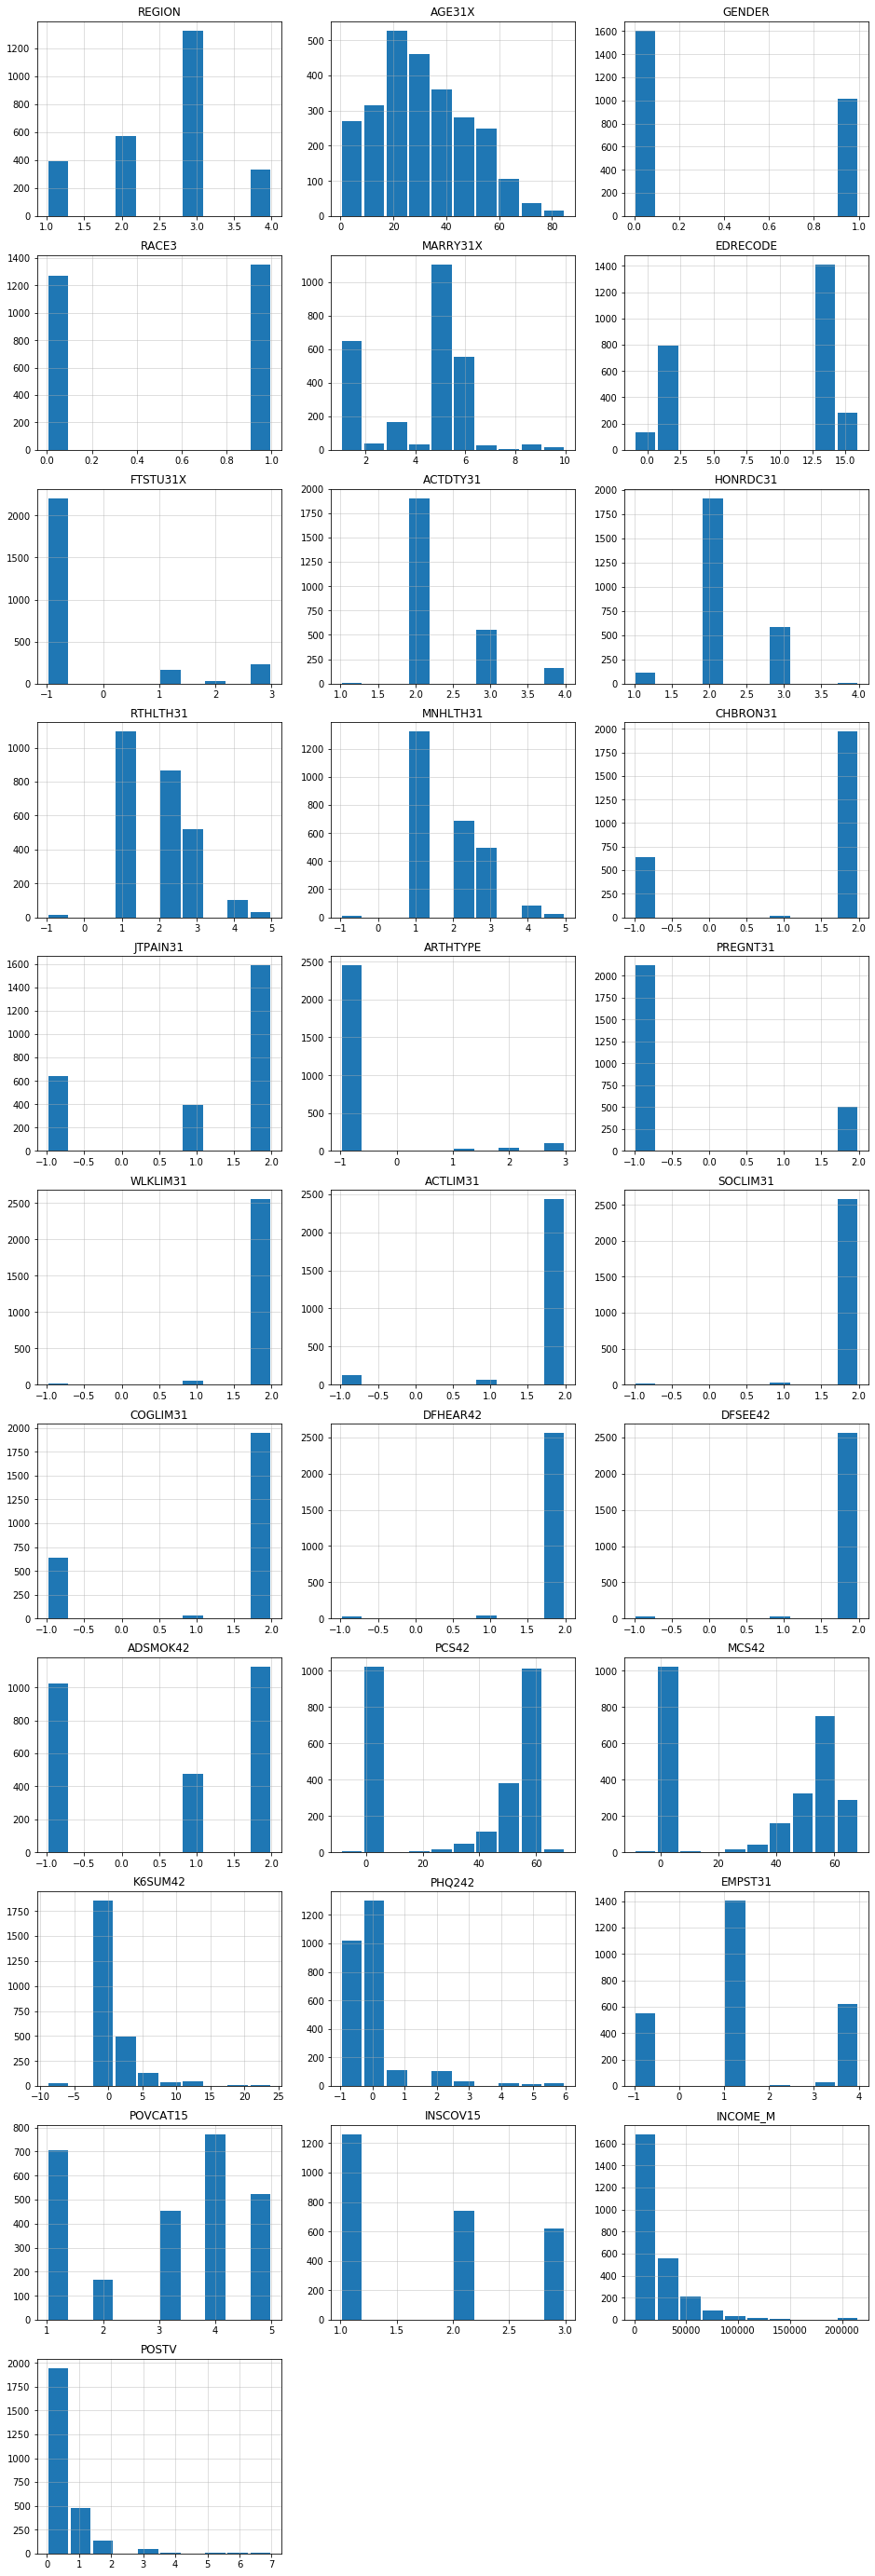

In [11]:
fig = plt.figure(figsize = (16, 50))
for idx, n in enumerate([name for name in X0.columns.values if name not in diagnoses_names]):
    i = idx + 1
    ax = fig.add_subplot(11, 3, i)
    x = X0[n].values
#     ax.boxplot(x, vert = False)
    ax.hist(x, bins = 10, rwidth = 0.9)
    ax.grid(alpha = 0.5)
    ax.set_title(n)

### Positive diagnoses = 0

In [12]:
X00 = X0[X0["POSTV"] == 0].copy()

In [13]:
X00.shape

(1947, 44)

In [14]:
print("Observations with positive diagnoses = 0 constitute about", int(100 * X00.shape[0] / X0.shape[0]), "% of observations with zero expenditures.")

Observations with positive diagnoses = 0 constitute about 74 % of observations with zero expenditures.


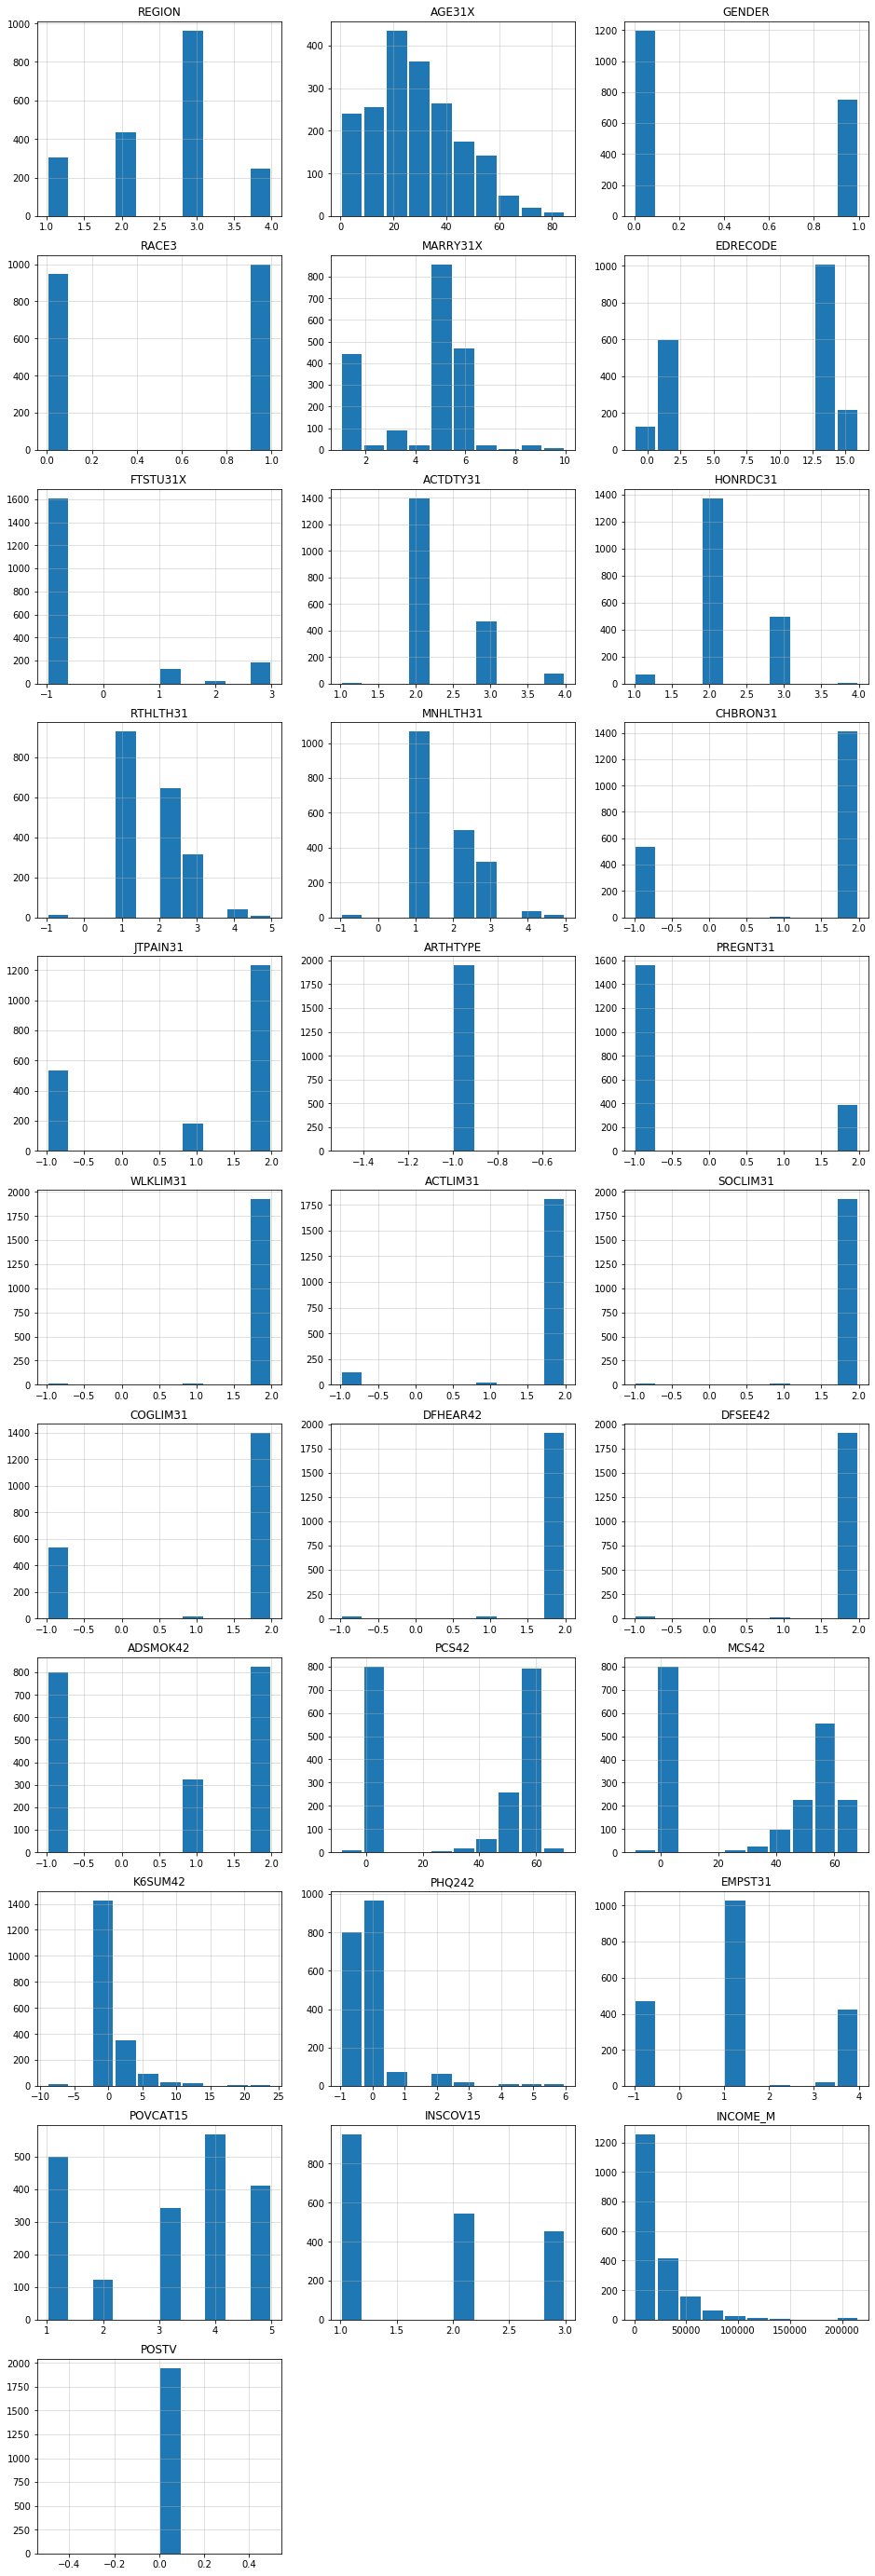

In [15]:
fig = plt.figure(figsize = (16, 50))
for idx, n in enumerate([name for name in X0.columns.values if name not in diagnoses_names]):
    i = idx + 1
    ax = fig.add_subplot(11, 3, i)
    x = X00[n].values
#     ax.boxplot(x, vert = False)
    ax.hist(x, bins = 10, rwidth = 0.9)
    ax.grid(alpha = 0.5)
    ax.set_title(n)

### Positive diagnoses > 0

In [16]:
X01 = X0[X0["POSTV"] > 0].copy()

In [17]:
X01.shape

(676, 44)

In [18]:
print("Observations with positive diagnoses > 0 constitute about", np.round(100 * X01.shape[0] / X0.shape[0], 2), "% of observations with zero expenditures.")
print("Observations with positive diagnoses > 1 constitute about", np.round(100 * X0[X0["POSTV"] > 1].shape[0] / X0.shape[0], 2), "% of observations with zero expenditures.")
print("Observations with positive diagnoses > 3 constitute about", np.round(100 * X0[X0["POSTV"] > 3].shape[0] / X0.shape[0], 2), "% of observations with zero expenditures.")

Observations with positive diagnoses > 0 constitute about 25.77 % of observations with zero expenditures.
Observations with positive diagnoses > 1 constitute about 7.55 % of observations with zero expenditures.
Observations with positive diagnoses > 3 constitute about 0.72 % of observations with zero expenditures.


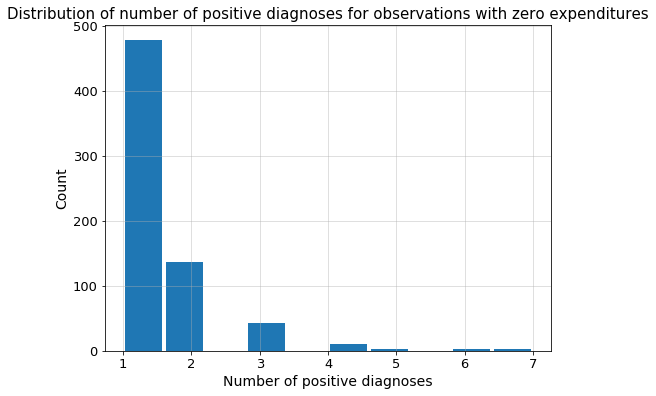

In [19]:
plt.figure(figsize = (8, 6))
plt.hist(X01["POSTV"], rwidth = 0.9)
plt.grid(alpha = 0.5)
plt.title("Distribution of number of positive diagnoses for observations with zero expenditures", size = 15)
plt.xlabel("Number of positive diagnoses", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13)
# plt.savefig("images/ .png")
plt.show()

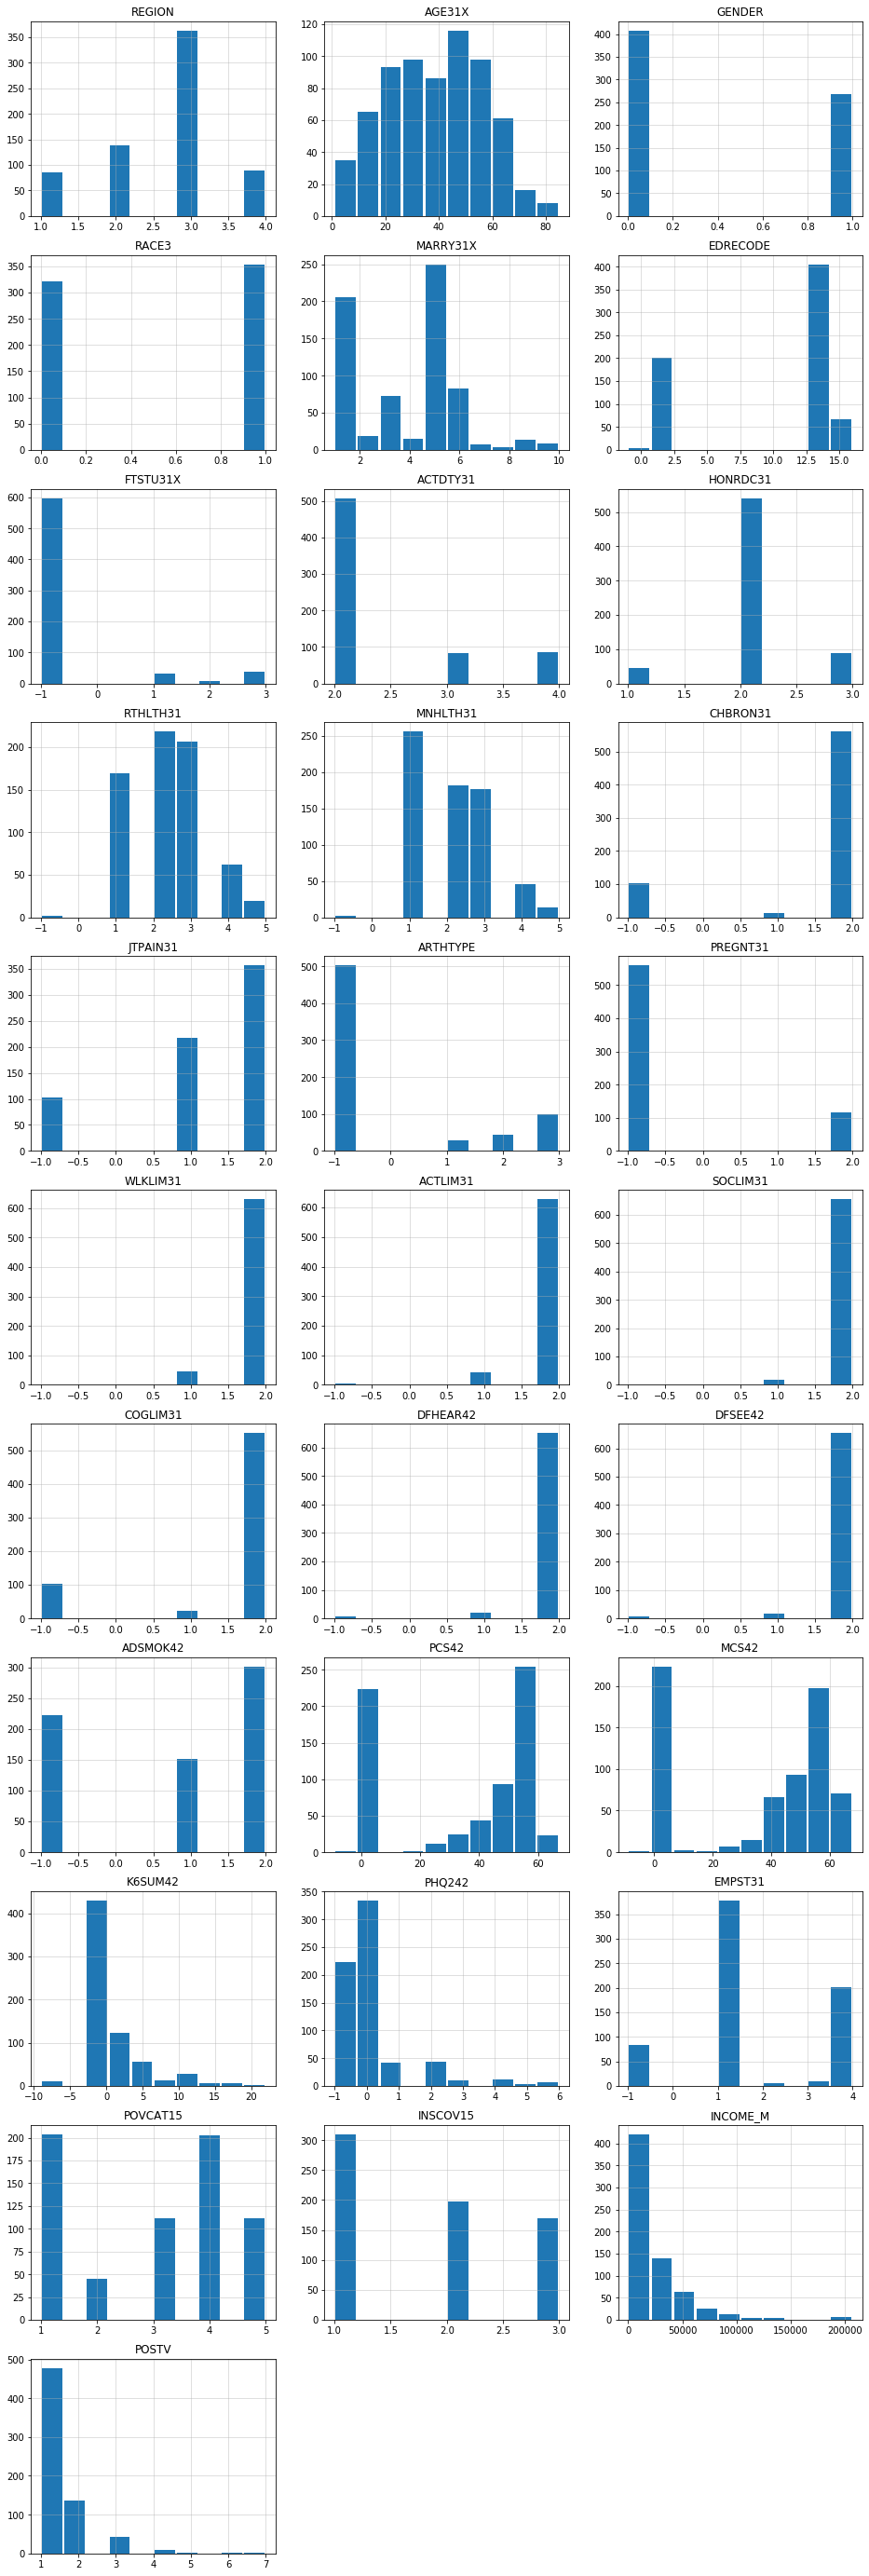

In [20]:
fig = plt.figure(figsize = (16, 50))
for idx, n in enumerate([name for name in X0.columns.values if name not in diagnoses_names]):
    i = idx + 1
    ax = fig.add_subplot(11, 3, i)
    x = X01[n].values
#     ax.boxplot(x, vert = False)
    ax.hist(x, bins = 10, rwidth = 0.9)
    ax.grid(alpha = 0.5)
    ax.set_title(n)

In [21]:
X02 = X0[X0["POSTV"] > 2].copy()

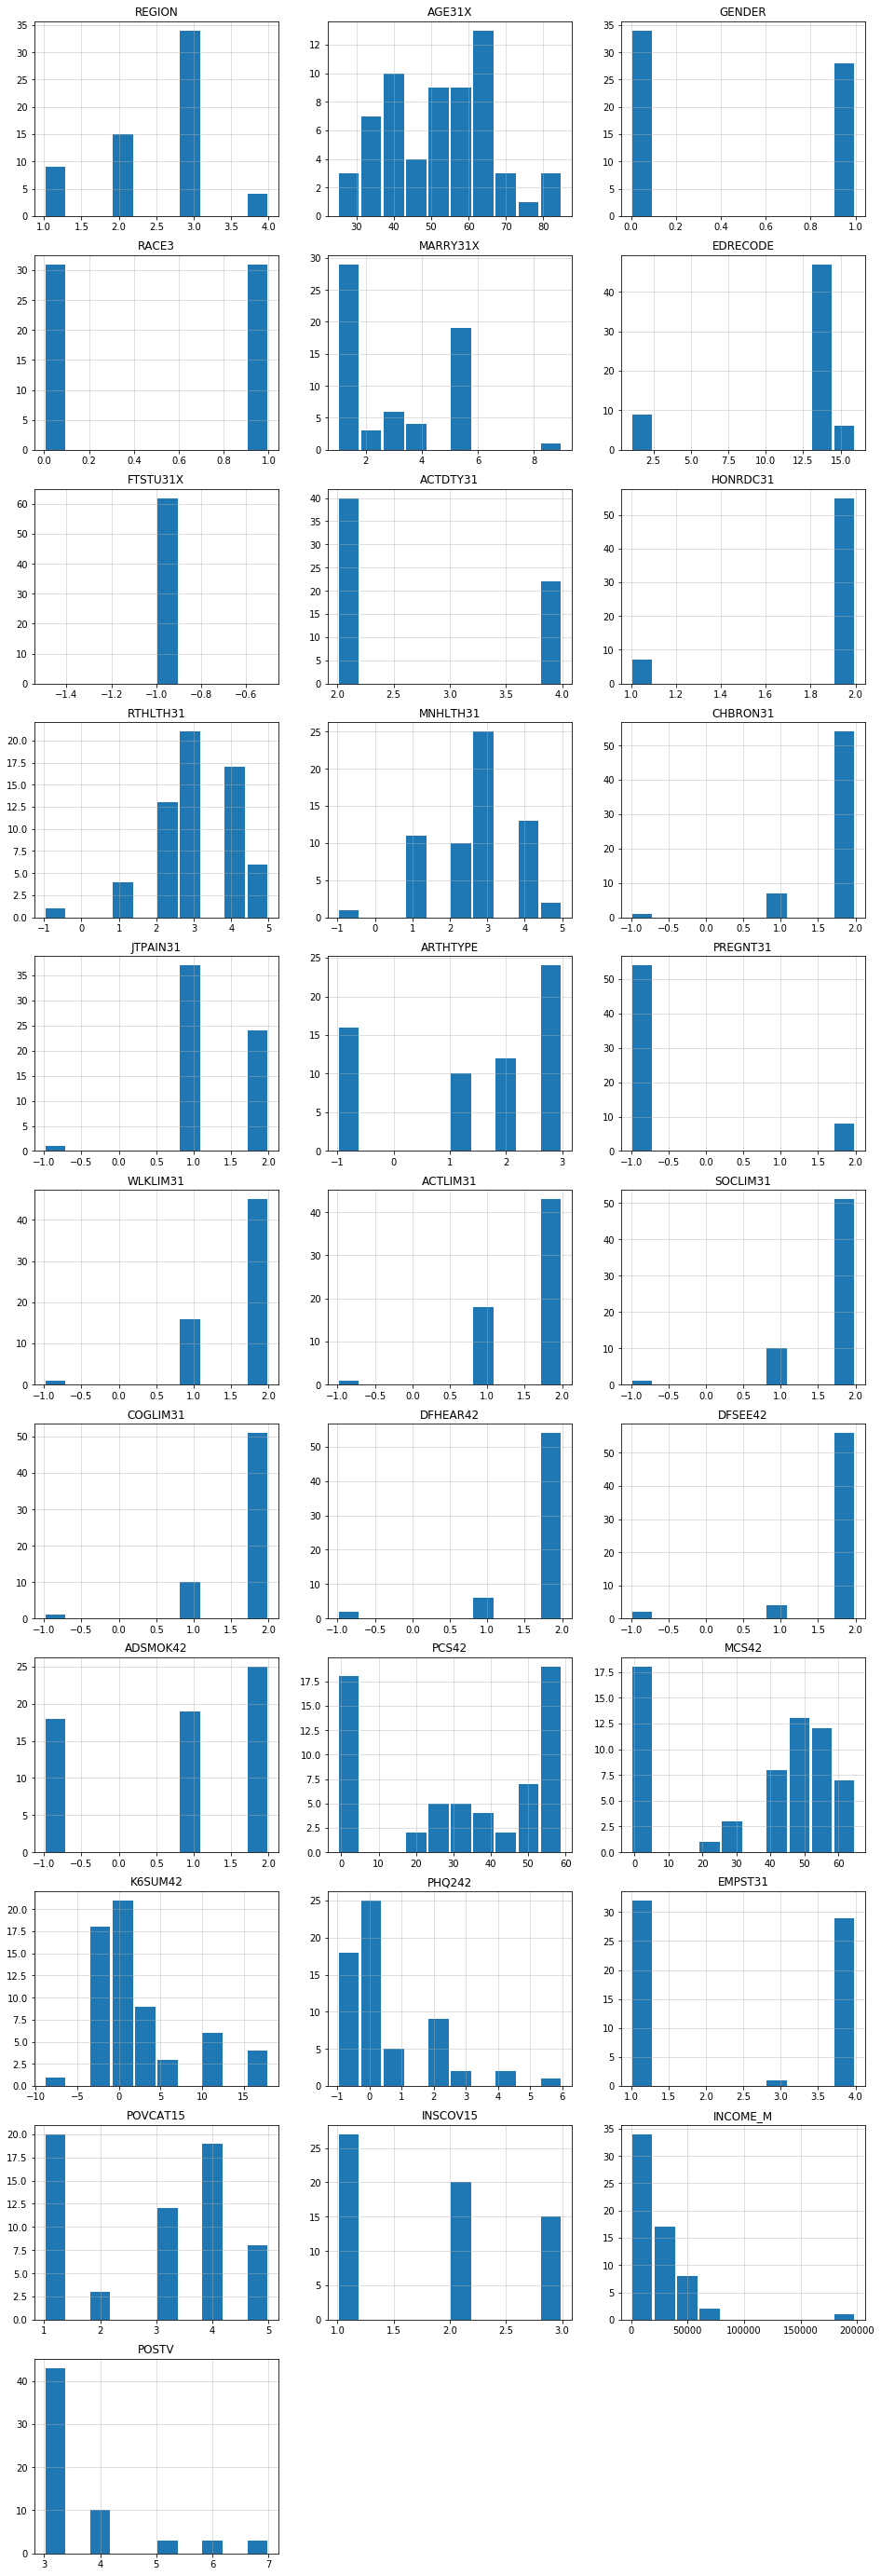

In [22]:
fig = plt.figure(figsize = (16, 50))
for idx, n in enumerate([name for name in X0.columns.values if name not in diagnoses_names]):
    i = idx + 1
    ax = fig.add_subplot(11, 3, i)
    x = X02[n].values
#     ax.boxplot(x, vert = False)
    ax.hist(x, bins = 10, rwidth = 0.9)
    ax.grid(alpha = 0.5)
    ax.set_title(n)